#### Background and Context:

Twitter posses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/services on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand, and their competitors, and discover new trends in the industry.

 

Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

Dataset:

The dataset has the following columns:
tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,                               airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,
tweet_location,user_timezone

Steps and tasks:

1. Import the libraries, load dataset, the print shape of data, data description. (5 Marks)
2. Understand of data columns: (5 Marks)
     a. Drop all other columns except “text” and “airline_sentiment”.
     b. Check the shape of the data.
     c. Print the first 5 rows of data.
3. Text pre-processing: Data preparation. (16 Marks)
NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatize or stemming.
     h. Join the words in the list to convert back to text string in the data frame. (So that each row
          contains the data in text format.)
     i. Print the first 5 rows of data after pre-processing.
4. Vectorization: (10 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
5. Fit and evaluate the model using both types of vectorization. (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization
     and performance of your model on this dataset. (8 Marks)
7.Overall notebook should have:(4 Marks)
     a. Well commented code
     b. Structure and flow

#### 1. Import the libraries, load dataset, the print shape of data, data description. (5 Marks)

In [1]:
import numpy as np
import pandas as pd
import re, string, unicodedata
import nltk                                   
import contractions

from bs4 import BeautifulSoup               
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet  
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
# Data Import
df=pd.read_csv(r'Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
#Data Shape
print("Shape of dataframe is: ",df.shape)

Shape of dataframe is:  (14640, 15)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
# Decribe Data
df.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


Data has 14.6K Tweets, tagged with sentiment polarity.  

#### 2.  Understand of data columns: (5 Marks) a. Drop all other columns except “text” and “airline_sentiment”. b. Check the shape of the data. c. Print the first 5 rows of data.

In [6]:
df1 = df.copy()

In [7]:
# Drop all other columns except “text” and “airline_sentiment”

df1.drop(df1.columns.difference(['airline_sentiment','text']), 1, inplace=True)
df1.columns

Index(['airline_sentiment', 'text'], dtype='object')

In [8]:
# Check the shape of the data
print('Shape of the current dataframe is: ',df1.shape)

Shape of the current dataframe is:  (14640, 2)


In [9]:
# Print the first 5 rows of data.
df1.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [10]:
df1['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Have more negative sentiment tagged tweets

#### 3. Text pre-processing: Data preparation.

In [11]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
Omitlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',"hasn't", 'haven', "haven't", 
            'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',"mustn't", 'needn', "needn't", 'shan', "shan't", 
            'shouldn', "shouldn't", 'wasn',"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stopwords = list(set(stopwords) - set(Omitlist))                              
print(stopwords)

['we', 'himself', 'down', 'so', 't', 've', 'above', 'ain', 'your', 'until', 'with', 'there', 'again', 'these', 'out', 'too', 'been', 'do', 'on', 'can', 'did', 'only', 'their', 'further', 'when', 'all', 'then', 'as', 'own', 'me', 'yours', "that'll", 'just', 'myself', 'over', 'herself', "she's", 'itself', 'you', 'my', 'y', 'them', 'and', 'for', 'in', 'up', 'ours', 'here', 's', "don't", 'have', 'the', 'if', 'were', 'those', 'between', 'more', 'during', 'd', 'which', "aren't", 'against', 'themselves', "you'd", 'each', 'who', 'should', 'about', 'being', 'how', 'a', 'other', 'off', 'ourselves', 'same', 'what', 'be', 'most', 'at', 'by', 'theirs', 'yourselves', 'him', 'to', 'our', 'under', 'had', 'no', 'will', 'now', 'aren', "it's", 'yourself', 'whom', 'he', 'why', "you're", 'once', 'into', 'its', 'because', 'after', 'such', 'some', 'below', 'his', "you'll", 'any', 'both', 'o', 'couldn', 'doing', 'was', 'has', 'than', 'of', 'before', 'few', 'she', 'but', 'her', 'i', 'or', 'it', 'while', 'throu

In [13]:
# a. Html tag removal.
def html_removal(text):
    parsed=BeautifulSoup(text, "html.parser")
    return parsed.get_text()

In [14]:
# Expand contractions
def contractions_replace(text):
    return contractions.fix(text)

In [15]:
# b. Tokenization.
# Implemented inside the below loop

In [16]:
# c. Remove the numbers.
def remove_nums(text):
    return re.sub(r'\d+', '', text)

In [17]:
# d. Removal of Special Characters and Punctuations.
def remove_punct_spchar(words):
    new_words = []
    for word in words:
        new_word =  re.sub(r'[^\w\s]', '', word)
        if new_word!='':
            new_words.append(new_word)
    return new_words

In [18]:
# e. Removal of stopwords 
def remove_stopwords(words, stopwords):
    new_words=[]
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [19]:
# f. Conversion to lowercase.
def to_lowerc(words):
    new_words=[]
    for word in words:
        new_words.append(word.lower())
    return new_words

In [20]:
# g. Lemmatize or stemming.
def lemm(words):
    lemmatizer = WordNetLemmatizer()
    new_words=[]
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

In [21]:
words_list=[]; new_words_no_punc=[]; new_words_lowercase=[];new_words_nstopw=[]; new_words_lemm=[]

for i  in range(df1.shape[0]):
    text = html_removal(df1.text[i]) # Html tag removal
    text = contractions_replace(text) # Expand contractions
    text = remove_nums(text) # Remove the numbers
    words_list=nltk.word_tokenize(text) # Tokenization
    new_words_no_punc = remove_punct_spchar(words_list) # Removal of Special Characters and Punctuations
    new_words_lowercase = to_lowerc(new_words_no_punc) # Conversion to lowercase
    new_words_nstopw = remove_stopwords(new_words_lowercase, stopwords) # Removal of stopwords
    new_words_lemm = lemm(new_words_nstopw) # Lemmatize
    df1.text[i] = ' '.join(new_words_lemm) # Join the words in the list to convert back to text string in the data frame

In [22]:
pd.set_option('max_colwidth', 120)
# i. Print the first 5 rows of data after pre-processing.
df1.head(10)

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica not today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing
5,negative,virginamerica seriously would pay flight seat not play really bad thing fly va
6,positive,virginamerica yes nearly every time fly vx ear worm not go away
7,neutral,virginamerica really miss prime opportunity men without hat parody https tcomwpggrezp
8,positive,virginamerica well notbut
9,positive,virginamerica amaze arrive hour early good


In [23]:
# print('Null values present: True or False? ', df1.isnull().values.any())
rstruct={'airline_sentiment':{'neutral':0, 'positive':1, 'negative':2}}
df1=df1.replace(rstruct)
df1.head()

,airline_sentiment,text
0,0,virginamerica dhepburn say
1,1,virginamerica plus add commercials experience tacky
2,0,virginamerica not today must mean need take another trip
3,2,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,2,virginamerica really big bad thing


Converted the tweets to lower case, removed puntuation, removed customized stop words, 
lemmatized the tweets rather stemming because we deal with sentiments, removed numbers, replaced contractions, removed html elements  

#### 4. Vectorization: (10 Marks) a. Use CountVectorizer. b. Use TfidfVectorizer. 5. Fit and evaluate the model using both types of vectorization

#### Use CountVectorizer

In [24]:
# Count vectorization
vectorizer = CountVectorizer(max_features=10000)
df1_features = vectorizer.fit_transform(df1['text'])
df1_features = df1_features.toarray()     
df1_features.shape

(14640, 10000)

In [25]:
labels=df1.airline_sentiment.astype('int')

In [26]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df1_features, labels, test_size=0.3, random_state=42,stratify=labels)
forest = RandomForestClassifier(n_estimators=20, n_jobs=5)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, df1_features, labels, cv=10)))

RandomForestClassifier(n_estimators=20, n_jobs=5)
0.7317622950819672


[[ 466   84  380]
 [ 113  398  198]
 [ 192   67 2494]]


<AxesSubplot:>

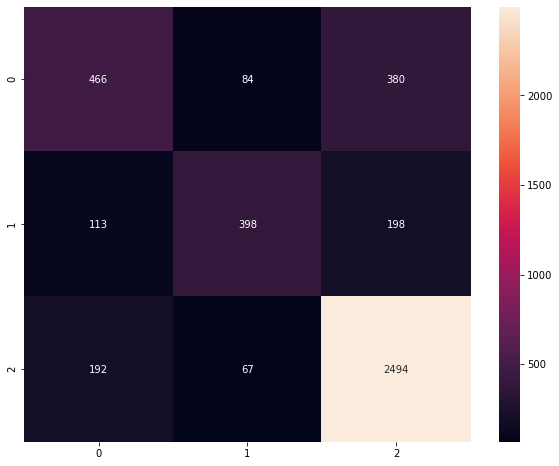

In [27]:
# Predict and plot confusion matrix
result = forest.predict(X_test)
conf_mat = confusion_matrix(y_test, result)
print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"], columns = [i for i in "012"])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True, fmt='g')

Stratified the dataset for balance  
Tested adjusting several hyper parameters ngrams, min_df, max_df, max_features

#### Use TfidfVectorizer

In [28]:
# TFIDF vectorizer
vectorizer = TfidfVectorizer(max_features=10000)
df1_features = vectorizer.fit_transform(df1['text'])
df1_features = df1_features.toarray()
df1_features.shape

(14640, 10000)

In [29]:
# splitting into training and testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(df1_features, labels, test_size=0.3, random_state=42,stratify=labels)
forest2 = RandomForestClassifier(n_estimators=20, n_jobs=5)
forest2 = forest.fit(X_train2, y_train2)
print(forest2)
print(np.mean(cross_val_score(forest2, df1_features, labels, cv=10)))

RandomForestClassifier(n_estimators=20, n_jobs=5)
0.7287568306010929


<AxesSubplot:>

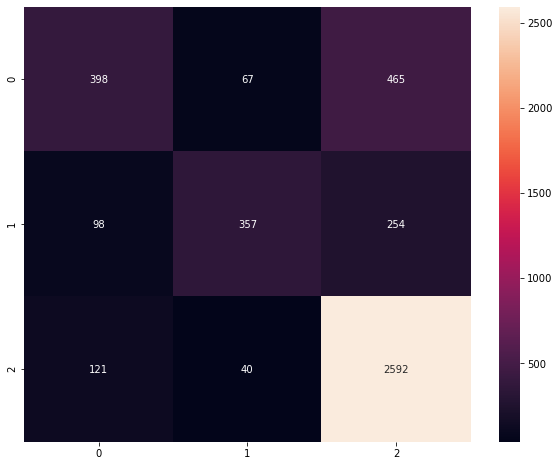

In [30]:
# Predict and plot confusion matrix
result2 = forest.predict(X_test2)
conf_mat2 = confusion_matrix(y_test2, result2)
df_cm2 = pd.DataFrame(conf_mat2, index = [i for i in "012"], columns = [i for i in "012"])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm2, annot=True, fmt='g')

Stratified the dataset for balance  
Tested adjusting several hyper parameters ngrams, min_df, max_df, max_features

#### 6. Summary

1. Given Dataset is a collection of tweets from Virgin America customers. Tweet sentiments scored as neutral, positive or negative sentiments. Converted the sentiments into numeric integers to feed into the model as targets.  
2. AS per assignment model constructed for text classification ie. sentiment analysis in the given text.  
3. Input data pre-processed. Converted the tweets to lower case, removed puntuation, removed customized stop words, 
lemmatized the tweets rather stemming because we deal with sentiments, removed numbers, replaced contractions, made free of html tags. These are done step by step using functions with loops iterating over the dataset.
4. Modified stop word list by omitting negative words fron the list so that we dont loose much information regarding the sentiment. 
5. As more negative sentiment tweets observed, used stratify in split to maintaing the class
6. Used randomforest classifier to train the model and predict with the test data.  
7. Two kinds of vectorization: Count vectorization and TFIDF were used to construct the model. 
8. Tested adjusting several hyper parameters ngrams, min_df, max_df, max_features no obvious difference in the performnace
9. Performance of Countvectorizer and TFID shows slight differential performace for diff sentiments. Count vectorizer well with neutral and positive,especially neutral whereas TFID better for negative sentiments. Therefore recommending different models.  
10. Although we know TFIDF is a better tool to vectorize since it balances out the term frequency with the word's inverse frequency unlike count vectorization where the frequency is simply calculated. Hence with count vectorization, there is a possibility of the model placing more importance to trivial words that do not contribute to the sentiment of the text. 
11. One needs to address the class balance with sampling techniques to address the unbalanced data, which is beyond the scope.